# Library

In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from import_KK import *
DeviceStrategy_CPU()
from preprocessing_KK import *
from description_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *
from visualization_KK import *

JAVA is in the system path?:  False
JAVA is in the system path?:  Adding...
Operation Machine:  x86_64
Operation Platform:  64bit
OS Type:  Linux
OS Version:  5.15.167.4-microsoft-standard-WSL2
Python Version:  3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]


[nltk_data] Downloading package stopwords to /home/kk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/kk/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package tagsets_json to /home/kk/nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!
2025-05-01 00:27:16.630908: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-01 00:27:16.652715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:0

Cuda is Ready?  True

Tensorflow Version:  2.18.0
Keras Version:  3.7.0
Torch Version:  2.5.0+cu124


In [47]:
# 종속변수 설정 (0 : 참여안함, 1 : 참여함)
def Y_variable(df):
    
    # 평생학습 효과성
    df['평생학습 효과성'] = df[['문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__1) 정신적 건강(정서적 안정감)',
                                  '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__2) 육체적 건강',
                                  '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__3) 사회참여 만족도',
                                  '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__4) 경제적 안정감']].mean(axis=1)
        
    # 조건에 따라 이진값 부여: 4.0미만은 불만족(0), 4.0 이상은 만족(1), 나머지 삭제 
    df['평생학습 만족도'] = df['평생학습 효과성'].apply(
        lambda x: 0 if x < 3.0 else (1 if x >=4.0 else None)
    )

    # None(=nan)이 들어간 행 제거
    df = df.dropna(subset=['평생학습 만족도'])
    
    # 원래 인덱스 초기화
    df = df.reset_index(drop=True)
    
    return df

# 형식, 비형식 유형별 컬럼 재분류 함수
def reclassify_program(x):
    if 1 <= x <= 10:
        return 1
    elif x == 11:
        return 2
    elif 12 <= x <= 17:
        return 3
    elif 18 <= x <= 24:
        return 4
    elif 25 <= x <= 27:
        return 5
    elif 28 <= x <= 30:
        return 6
    else:
        return np.nan

# 파생변수 생성 함수
def derived_variable(df):
    # 파생변수 변환 컬럼 선택
    col_groups1 = {
#         '평생학습 효과성 평균': [
#             '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__1) 정신적 건강(정서적 안정감)',
#             '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__2) 육체적 건강',
#             '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__3) 사회참여 만족도',
#             '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__4) 경제적 안정감'],
        '학습 지향 평균': [
            '문F1-5) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__교육훈련은 보다 나은 일상생활을 영위하는 데 도움을 준다.',
            '문F1-6) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__새로운 것을 배우는 것은 즐겁다.',
            '문F1-7) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__학습을 통해 자신감을 얻는다.',
            '문F1-8) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__성인학습자는 자신의 학습을 위해 무언가를 지불할 각오를 해야 한다.'],
        '직업관련 목표지향 평균': [
            '문F1-1) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__성인이 되어서도 지속적으로 학습을 하는 사람은 일자리를 잃을 가능성이 적다.',
            '문F1-2) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__성공적인 직장생활을 위해서는 지식과 기술을 끊임없이 향상시켜야 한다.',
            '문F1-3) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__고용주는 고용인들의 훈련을 책임져야 한다.']
    }

    # 각 그룹별 평균 계산
    for group_name, columns in col_groups1.items():
        df[group_name] = df[columns].mean(axis=1, skipna=True)

    # 각 그룹별 컬럼 리스트 딕셔너리로 정리
    col_groups2 = {
        '무형식학습(의존형) 참여': ['문B1-1) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__가족^ 친구 또는 직장동료^ 상사의 도움이나 조언을 통해 지식을 습득한 적이 있다', 
                      '문B1-5) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__학습을 목적으로 텔레비전^ 라디오 등을 활용해서 새로운 지식을 습득한 적이 있다', 
                      '문B1-6) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__책이나 전문잡지 등 인쇄매체를 활용해서 지식을 습득한 적이 있다'],
        '무형식학습(온라인) 참여': ['문B1-2) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__트위터^ 페이스북^ 카페^ 블로그^ 밴드 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다', 
                      '문B1-3) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__유튜브(Youtube) 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다', 
                      '문B1-4) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__인터넷 뉴스^ E-book 등 온라인매체를 활용해서 새로운 정보나 기술을 습득한 적이 있다',],
        '무형식학습 (암묵적 학습) 참여': ['문B1-7) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__역사적·자연적·산업적 장소를 방문해서 지식을 습득한 적이 있다',
                    '문B1-8) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__도서관 등을 방문해서 새로운 사실을 배운 적이 있다',
                    '문B1-9) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__축제^ 박람회^ 음악회 등에 참여해서 무언가를 새롭게 배우거나 깊이 있게 알게된 적이 있다',
                    '문B1-10) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__스포츠^ 등산 등 신체를 움직이는 활동에 참여해서 무언가를 새롭게 배우거나 깊이 있게 알게 된 적이 있다']
    }
    
    # 반복문으로 파생변수 생성 (1 → 1, 2 → 0 으로 변환 후 처리) #1있음, 2없음 #1참여안함,2참여함 
    for group_name, columns in col_groups2.items():
        df[group_name] = (df[columns].applymap(lambda x: 1 if x == 1 else 0)
                                     .any(axis=1)
                                     .astype(int))    

    cols_groups3 = {
        '사회참여': [
                    '문G1-1) 지난 한 해 동안 자원봉사 또는 재능기부를 한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여경험',
                    '문G1-2) 지난 한 해 동안 자선단체에 기부 또는 후원한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여경험',
                    '문G1-3) 지난 한 해 동안 동아리에서 활동한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여경험',
                    '문G1-4) 지난 한 해 동안 지역사회단체에 참여한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여경험'
        ]
    }
    
    # 1->0, 2->1 으로 변환 후, 파생변수 처리(1이 하나라도 있으면 1)
    for group_name, columns in cols_groups3.items():
        df[group_name] = (df[columns].applymap(lambda x: 2 if x == 1 else 0)
                                     .any(axis=1)
                                     .astype(int))
    return df

def other_variable(df):
    # 1:예 2:아니오 -> 1:예 0:아니오
    df['문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?'] = df['문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?'].map({1: 1, 2: 0})

    # 99(모른다) -> 5(중간 정도 만족) : 54개 값 이동
    df['문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?'] = df['문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?'].replace(99, 5)

    # 9(모름) -> Nan -> 0
    df[['직장의 규모', '근무기간']] = df[['직장의 규모', '근무기간']].replace(9, np.nan)

    df['문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1'] = df['문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1'].apply(reclassify_program)

    df['문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?'] = df['문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?'].map({1: 1, 2: 0})

    df['근로시간형태'] = df['근로시간형태'].replace(np.nan, 0)
    
    # 형식, 비형식 교육 참여자  
    df['형식교육 참여자'] = df['형식교육 참여자'].map({1:1, 2:0})
    df['비형식교육 참여자'] = df['비형식교육 참여자'].map({1:1, 2:0})
    
    # 건강에 대한 자신감
    df['DQ6. 귀하께서는 건강에 자신 있습니까?'] = df['DQ6. 귀하께서는 건강에 자신 있습니까?'].map({1:4, 2:3, 3:2, 4:1})
    
    return df

# 전체 전처리 함수
def preprocessing_edu(file_path):
    # 데이터 불러오기
    df = pd.read_csv(file_path)
    del df['ID']
    del df['원가중치']
    
    # 년도 재정렬
    df = df.sort_values(by='key', ascending=False)
    # 인덱스 초기화
    df = df.reset_index(drop=True)
    
    # 컬럼명 변경
    df.columns = [
        col.replace('B1', 'A3') if '문B1' in col and '귀하께서 작년에 참여한 학습경험이 전반적으로' in col else col
        for col in df.columns]

    # DQ1. 22년과 18년도  value차이 조정
    df.loc[(df['key'] == 2018) & (df['DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분'] == 3), 'DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분'] = 5

    # 파생변수 생성
    df = derived_variable(df)

    # Y 변수 생성
    df = Y_variable(df)

    # 그 외 변수 조정
    df = other_variable(df)

    # Y값 분리
    Y = df[['평생학습 만족도']]
    df = df.drop(['평생학습 만족도'], axis=1)
      
    nan_col0 = ['직업관련 비형식교육 참여자', '고용형태', '직업', '직장의 규모', '근무기간', '취약계층', 
           'DQ9. 귀하의 현재 고용형태는 어떻게 되십니까?', 'DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?', 
           'DQ11. 귀하가 현재 소속되어 있는 직장의 규모는 어느 정도입니까? (사업장^ 상시근로자 기준)', 'DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분', 
           '문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1', 
           '문B1-3) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__유튜브(Youtube) 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다', 
           '문B1-4) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__인터넷 뉴스^ E-book 등 온라인매체를 활용해서 새로운 정보나 기술을 습득한 적이 있다',
           '문G1-3) 지난 한 해 동안 동아리에서 활동한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여횟수', 'DQ3. 몇 명과 함께 지내고 있습니까?__명',
           'DQ12. 귀하의 현재 직장에서의 근무기간은 얼마나 되십니까?__년', 'DQ12. 귀하의 현재 직장에서의 근무기간은 얼마나 되십니까?__개월',
               
            '문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1',
            'DQ9-1. 귀하의 현재 종사상 지위는 어떻게 되십니까?', 'DQ9-2. 귀하의 현재 근로시간형태는 어떻게 되십니까?']

    # 범주형/연속형 컬럼의 NaN -> 0 변경
    df[nan_col0] = df[nan_col0].fillna(0)
  
    # 빈 문자열을 NaN으로 변환
    df.replace(' ', np.nan, inplace=True)
    # 50% 이상 결측값인 컬럼 삭제
    threshold = len(df) * 0.5
    df_cleaned = df.dropna(thresh=threshold, axis=1)
    # 단일 값만 존재하는 컬럼 삭제
    df_cleaned = df_cleaned.loc[:, df_cleaned.nunique() > 1]
    
    # 원래 데이터에서 분리했던 칼럼 다시 결합
    df_cleaned = pd.concat([df_cleaned, Y], axis=1)

    # 최종 데이터 저장
    #df_cleaned.to_csv('df_preprocessing_0415.csv', index=False)
    return df_cleaned

# 선택한 컬럼
selected_cols = ['평생학습 만족도', '학습 지향 평균', '직업관련 목표지향 평균', '무형식학습(의존형) 참여', 
                    '무형식학습(온라인) 참여', '무형식학습 (암묵적 학습) 참여', '사회참여', 
                    '문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?', '문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?',
                    '문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1', '문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?', 
                    '문E1-1) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 책이나 판서 수업 중심으로 공부하는 것이 익숙하고 잘된다.',
                    '문E1-2) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 인터넷강의 또는 컴퓨터(전자책^ 태블릿 PC^스마트폰)를 활용한 학습이 익숙하고 잘된다.',
                    '문E1-3) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 혼자서 공부하는 것이 익숙하고 좋다.',
                    '문E1-4) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 다른 사람들과 함께 공부 하는 것이 좋다.',
                    '성별', '연령별(1)', '학력별', '경활상태', '월 가구소득', '지역규모별', '부양가족 유무', 'DQ6. 귀하께서는 건강에 자신 있습니까?', '취업구분',
                    '근로시간형태', '직업', '직장의 규모', '근무기간', '형식교육 참여자','비형식교육 참여자', 'key', 
                 
                    '문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1',
                    'DQ9-1. 귀하의 현재 종사상 지위는 어떻게 되십니까?',
                    'DQ9-2. 귀하의 현재 근로시간형태는 어떻게 되십니까?'  ]

# Hyperparameters

In [48]:
# 전처리
Y_colname = '평생학습 만족도'
test_size = 0.2
random_state = 123
LABEL_LIST = ['Non-satisfaction', 'Satisfaction']
sampling_strategy = 'auto'    # 'minority', 'not majority', 'not minority', 'all', 'auto'
# 모델링
SHAP = True
X_TOP_DISPLAY = 50
DEPENDENCY = False
################
tf.random.set_seed(123)
NODE_MLP = [128, 256, 128, 64, 32, 10]
NODE_CNN1 = [128, 256, 128]
NODE_CNN2 = [64, 32, 10]
KERNEL_SIZE = 5
STRIDE = 1
PADDING = 'same'
POOL_SIZE = 2
POOL_STRIDE = 2
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = None
# REGULARIZER = regularizers.l2(0.001)
DROPOUT_RATIO = 0.25
LOSS = 'binary_crossentropy'
LEARNING_RATE = 0.001
# OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']    # 'accuracy', 'Precision', 'Recall', 'AUC', 'F1Score'
VALIDATION_SPLIT = 0.25
VALIDATION_DATA = None
BATCH_SIZE = 64
EPOCHS = 1000
VERBOSE = 0
################
MONITOR = 'val_accuracy'    # 'val_accuracy', 'val_precision', 'val_recall', 'val_f1'
MONITOR_MODE = 'max'
EARLYSTOP_PATIENT = 200

# Data Preprocessing

In [49]:
df_raw = preprocessing_edu(os.path.join('.', 'Data', 'df_merged.csv'))
# 모델링 데이터 선택
df_raw = df_raw[selected_cols]
df = df_raw[df_raw['비형식교육 참여자'] == 1]
df_test = df_raw[df_raw['비형식교육 참여자'] == 0]
# 종속변수 및 독립변수 설정
X_colname = [x for x in df.columns if x not in [Y_colname, '비형식교육 참여자']]
print(df[Y_colname].value_counts())

# Train, Test 분리
X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[[Y_colname]],
                                                    test_size=test_size, random_state=random_state)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print('Data Split!')
# 기술통계
# plot_classfrequency(df, Y_colname, label_list=label_list)
# comparisonstat_origin = table_ratiobyclass(df, Y_colname, label_list=label_list, sorting=True)
# display(comparisonstat_origin)
# comparisonstat_origin.to_csv(os.path.join(os.getcwd(), 'Result', 'DescriptiveStatistics_Binary.csv'), 
#                              index=True, encoding='utf-8-sig')
# 스케일링
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())   

# 샘플링
if df[Y_colname].value_counts().sort_values(ascending=False).index[0] == 0:
    sampling_method = 'RandomUnderSampler'
    sampler, X_train, Y_train = undersampling(X_train, Y_train,
                                                method=sampling_method, strategy=sampling_strategy,
                                                random_state=random_state)
else:
    sampling_method = 'SMOTE' # 'SMOTETomek' #'ADASYN'
    sampler, X_train, Y_train = oversampling(X_train, Y_train, 
                                                     method=sampling_method, strategy=sampling_strategy, 
                                                     random_state=random_state)

평생학습 만족도
1.0000    7136
0.0000     863
Name: count, dtype: int64
(6399, 32) (6399, 1)
(1600, 32) (1600, 1)
Data Split!
(6399, 32) (6399, 1) 0.0 1.0000000000000002
(1600, 32) (1600, 1) 0.0 1.0000000000000002
Ratio of Origin Y:  평생학습 만족도
1.0000      5701
0.0000       698
Name: count, dtype: int64
Ratio of Sapling Y:  평생학습 만족도
0.0000      5701
1.0000      5701
Name: count, dtype: int64


# Modeling

Explanations of Y:


Features  \
0                                                                                              학습 지향 평균   
1                                                                  문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?   
2                                                                                          직업관련 목표지향 평균   
3                     문E1-4) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 다른 사람들과 함께 공부 하는 것이 좋다.   
4                                                                                                연령별(1)   
5                                                                               DQ6. 귀하께서는 건강에 자신 있습니까?   
6                                                                                                  경활상태   
7                                                               문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1   
8   문E1-2) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 인터넷강의 또는 컴퓨터(전자책^ 태블릿 PC^스마트폰)를 활용한 학습...   
9                        문E1-3) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 혼자서 공부하는 것이 익숙하고 좋다.   
10                                                                                                 사회참여   
11                                                          문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?   
12                                                                                               월 가구소득   
13                                                                                    무형식학습 (암묵적 학습) 참여   
14           문E1-1) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 책이나 판서 수업 중심으로 공부하는 것이 익숙하고 잘된다.   
15                                                                      DQ9-1. 귀하의 현재 종사상 지위는 어떻게 되십니까?   
16                        문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?   
17                                                    문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1   
18                                                                                               직장의 규모   
19                                                                                                   직업   

     Coef     Odds                         Features    Coef   Odds  
0  6.7840 883.5682                             취업구분 -0.8065 0.4464  
1  6.4115 608.7804                              key -0.4945 0.6098  
2  2.3134  10.1085                         형식교육 참여자 -0.4090 0.6643  
3  1.5908   4.9075                              학력별 -0.3843 0.6809  
4  1.2723   3.5690                            지역규모별 -0.2636 0.7683  
5  1.0550   2.8720                               성별 -0.1329 0.8756  
6  0.8062   2.2394                          부양가족 유무 -0.1135 0.8927  
7  0.7787   2.1786                             근무기간 -0.1122 0.8939  
8  0.6465   1.9089                    무형식학습(온라인) 참여 -0.0889 0.9150  
9  0.5973   1.8173                    무형식학습(의존형) 참여 -0.0476 0.9535  
10 0.4599   1.5840                           근로시간형태 -0.0404 0.9604  
11 0.4033   1.4967  DQ9-2. 귀하의 현재 근로시간형태는 어떻게 되십니까? -0.0404 0.9604  
12 0.3380   1.4021                              NaN     NaN    NaN  
13 0.3129   1.3674                              NaN     NaN    NaN  
14 0.3083   1.3612                              NaN     NaN    NaN  
15 0.1459   1.1571                              NaN     NaN    NaN  
16 0.1299   1.1387                              NaN     NaN    NaN  
17 0.1171   1.1243                              NaN     NaN    NaN  
18 0.0870   1.0909                              NaN     NaN    NaN  
19 0.0049   1.0049                              NaN     NaN    NaN

Performance: 


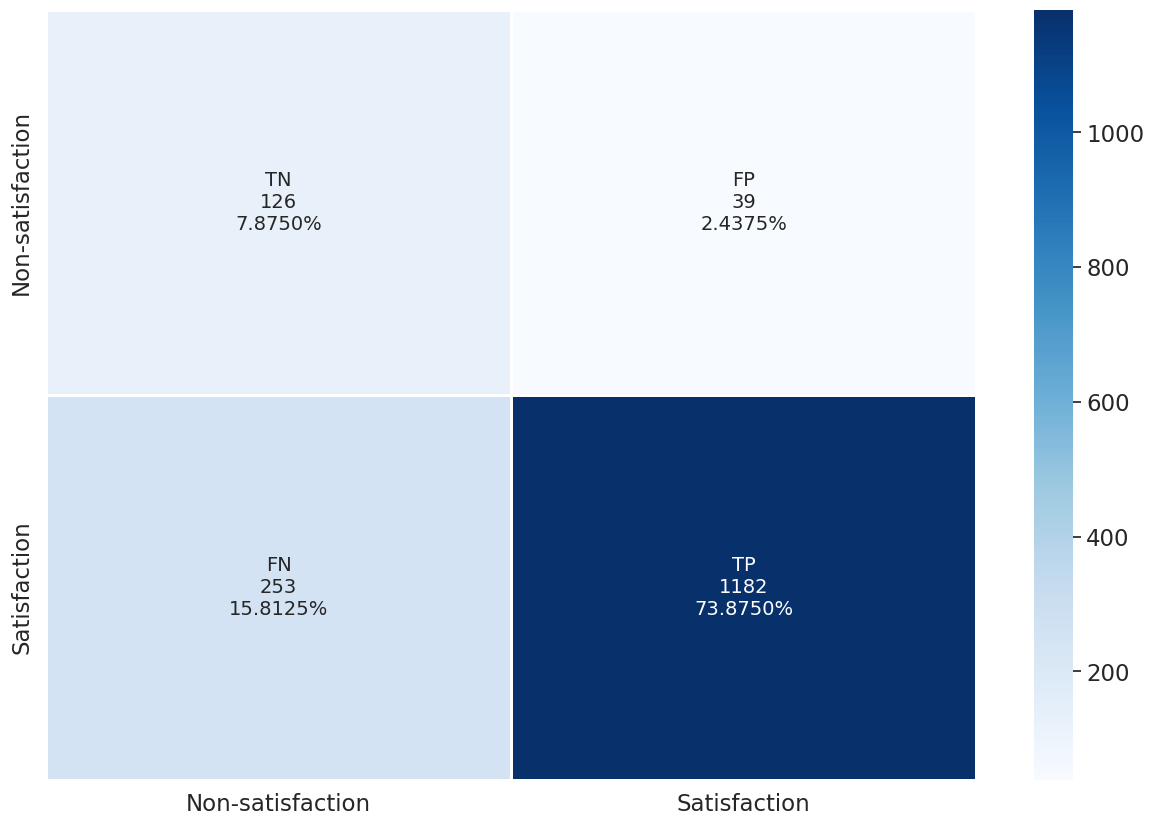

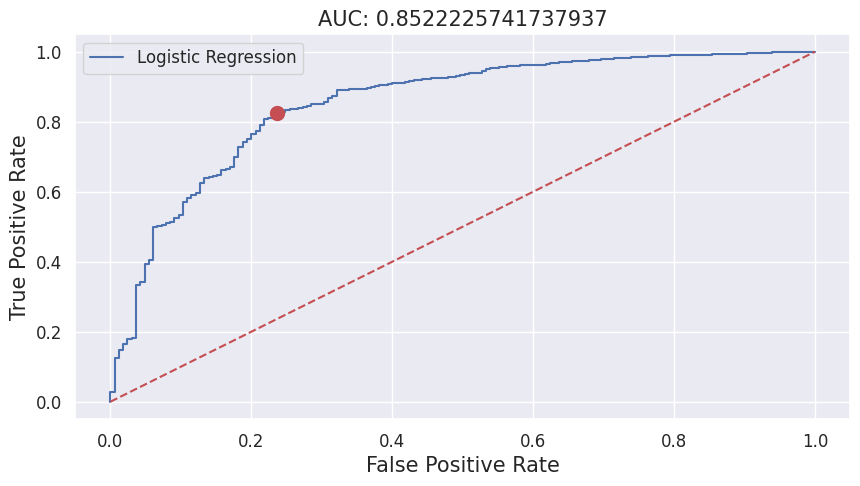

LogisticRegression(class_weight='balanced')

N True Positive True Negative False Positive False Negative  \
Test set  1600          1182           126             39            253   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9681 0.8237      0.7636   0.8901   0.8175            0.7937   

            AUC  
Test set 0.8522

N True Positive True Negative False Positive  \
Entire population  13002          5809          4643           1223   

                  False Negative Precision Recall Specificity F1-score  \
Entire population           1327    0.8261 0.8140      0.7915   0.8200   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.8039            0.8028 0.8846

In [50]:
model_lr, Score_te_lr, Score_trte_lr = modeling_LogisticRegression(X_train, Y_train, X_test, Y_test, 
                                                         X_colname=X_colname,
                                                         shap=not SHAP,
                                                         X_top_display=X_TOP_DISPLAY,
                                                         dependency=DEPENDENCY,
                                                         label_list=LABEL_LIST)
display(model_lr, Score_te_lr, Score_trte_lr)

Explanations of Y:


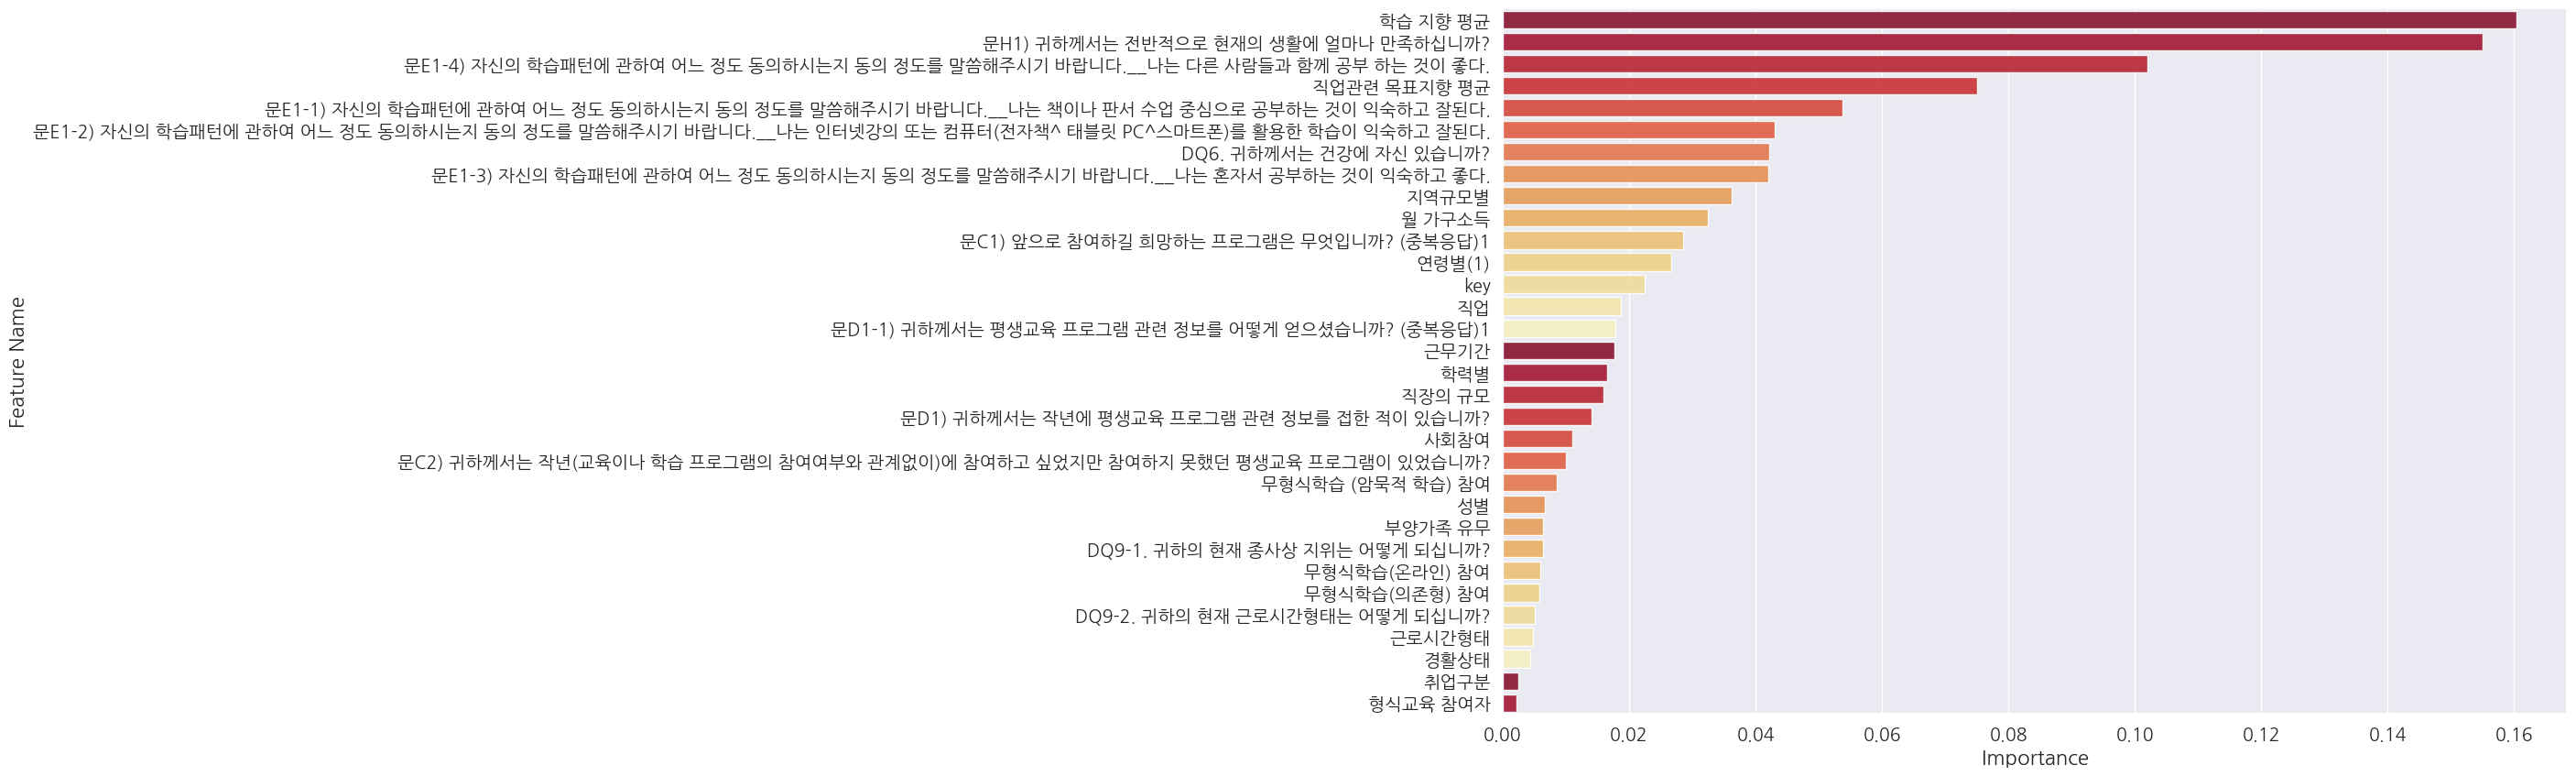

Performance: 


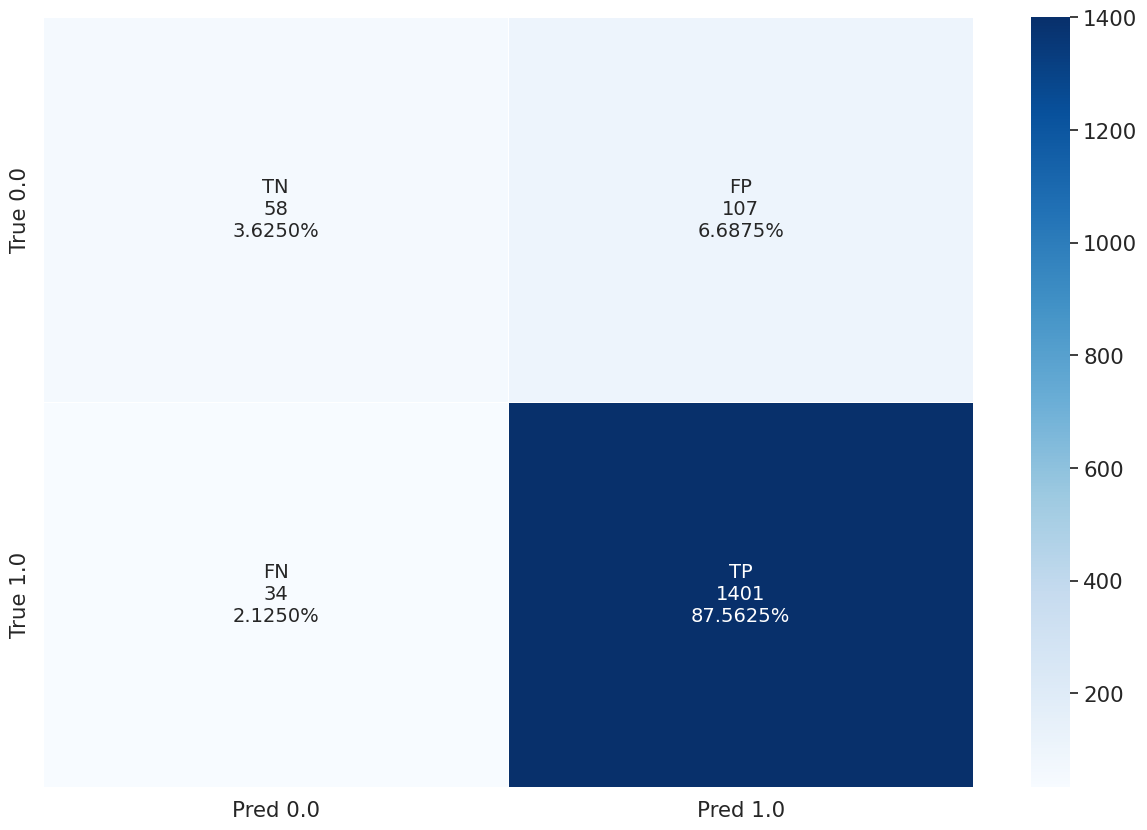

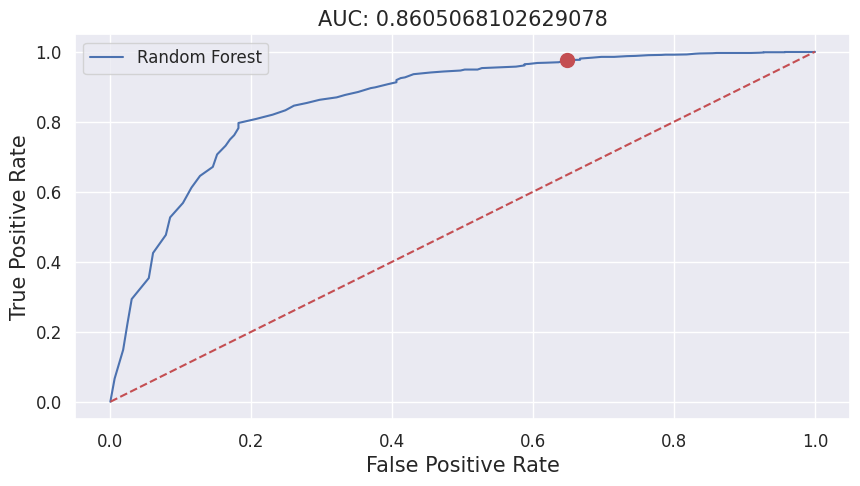

RandomForestClassifier(class_weight='balanced', random_state=123)

N True Positive True Negative False Positive False Negative  \
Test set  1600          1401            58            107             34   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9290 0.9763      0.3515   0.9521   0.9119            0.6639   

            AUC  
Test set 0.8605

N True Positive True Negative False Positive  \
Entire population  13002          7102          5758            108   

                  False Negative Precision Recall Specificity F1-score  \
Entire population             34    0.9850 0.9952      0.9816   0.9901   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9891            0.9884 0.9981

In [51]:
model_rf, Score_te_rf, Score_trte_rf = modeling_RandomForestClassifier(X_train, Y_train, 
                                                             X_test, Y_test, 
                                                             X_colname=X_colname, 
                                                             shap=not SHAP, 
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             dependency=DEPENDENCY,
                                                             label_list=LABEL_LIST)
display(model_rf, Score_te_rf, Score_trte_rf)

Explanations of Y:


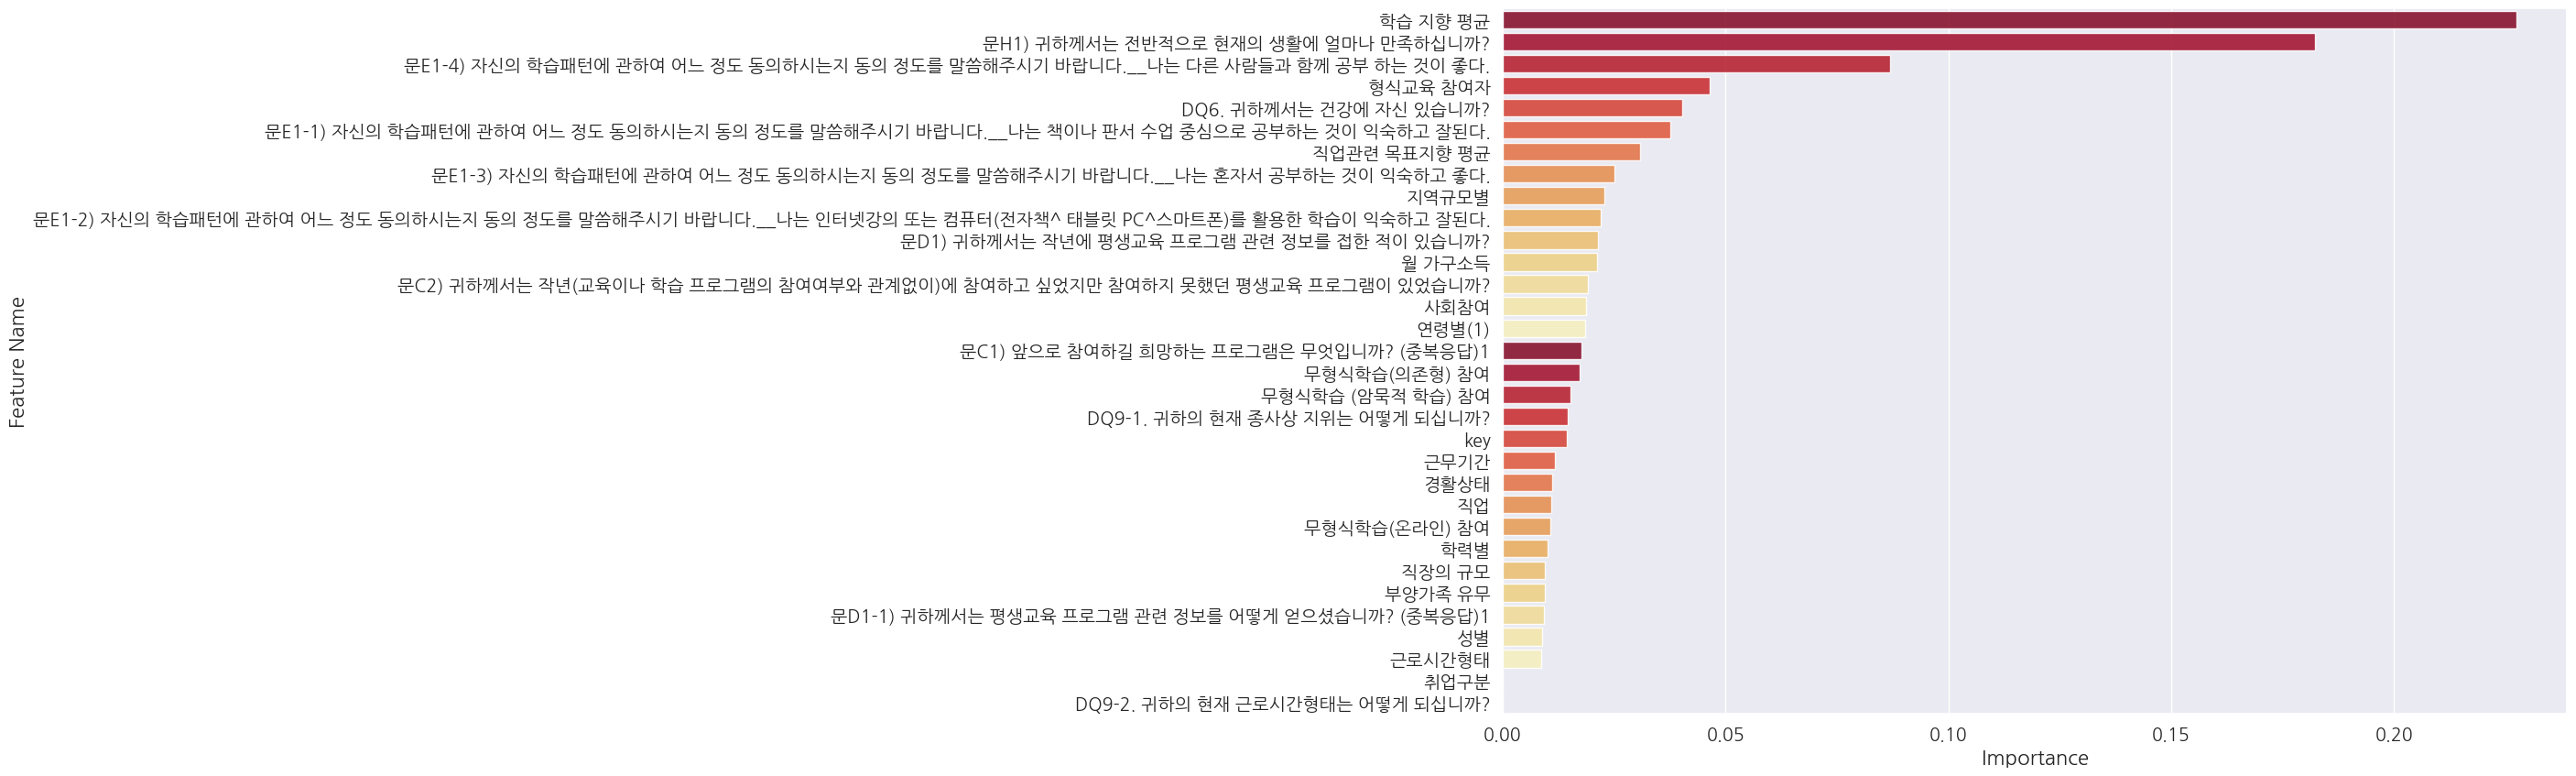

Performance: 


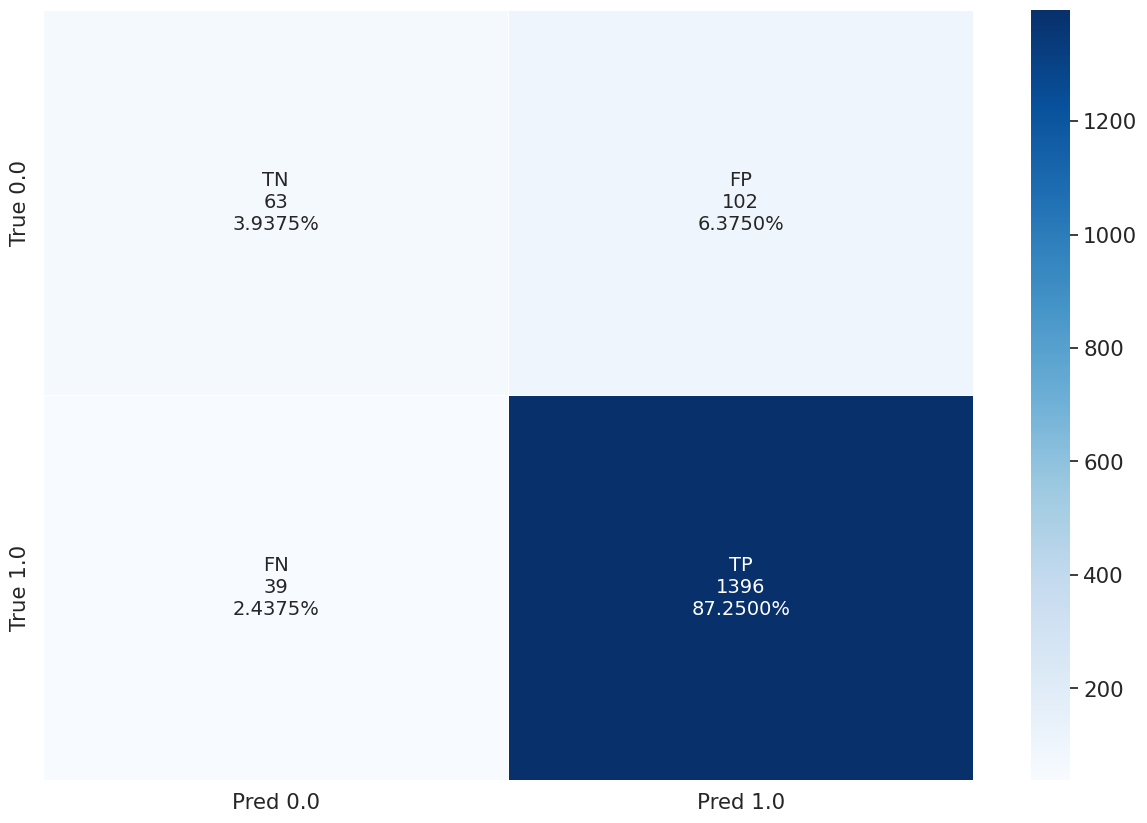

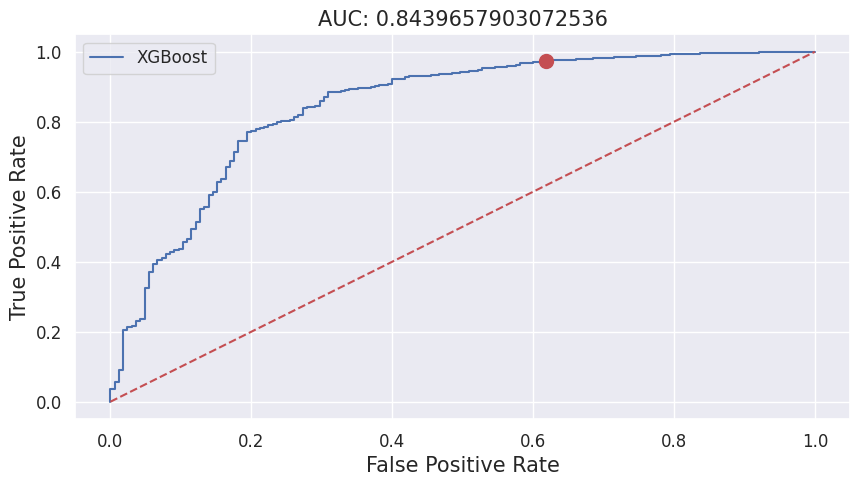

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

N True Positive True Negative False Positive False Negative  \
Test set  1600          1396            63            102             39   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9319 0.9728      0.3818   0.9519   0.9119            0.6773   

            AUC  
Test set 0.8440

N True Positive True Negative False Positive  \
Entire population  13002          7097          5722            144   

                  False Negative Precision Recall Specificity F1-score  \
Entire population             39    0.9801 0.9945      0.9755   0.9873   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9859            0.9850 0.9961

In [52]:
model_xgb, Score_te_xgb, Score_trte_xgb = modeling_XGBClassifier(X_train, Y_train, 
                                                      X_test, Y_test, 
                                                      X_colname=X_colname, 
                                                      shap=not SHAP, 
                                                      X_top_display=X_TOP_DISPLAY, 
                                                      dependency=DEPENDENCY,
                                                      label_list=LABEL_LIST)
display(model_xgb, Score_te_xgb, Score_trte_xgb)

[LightGBM] [Info] Number of positive: 5701, number of negative: 5701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7691
[LightGBM] [Info] Number of data points in the train set: 11402, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Explanations of Y:


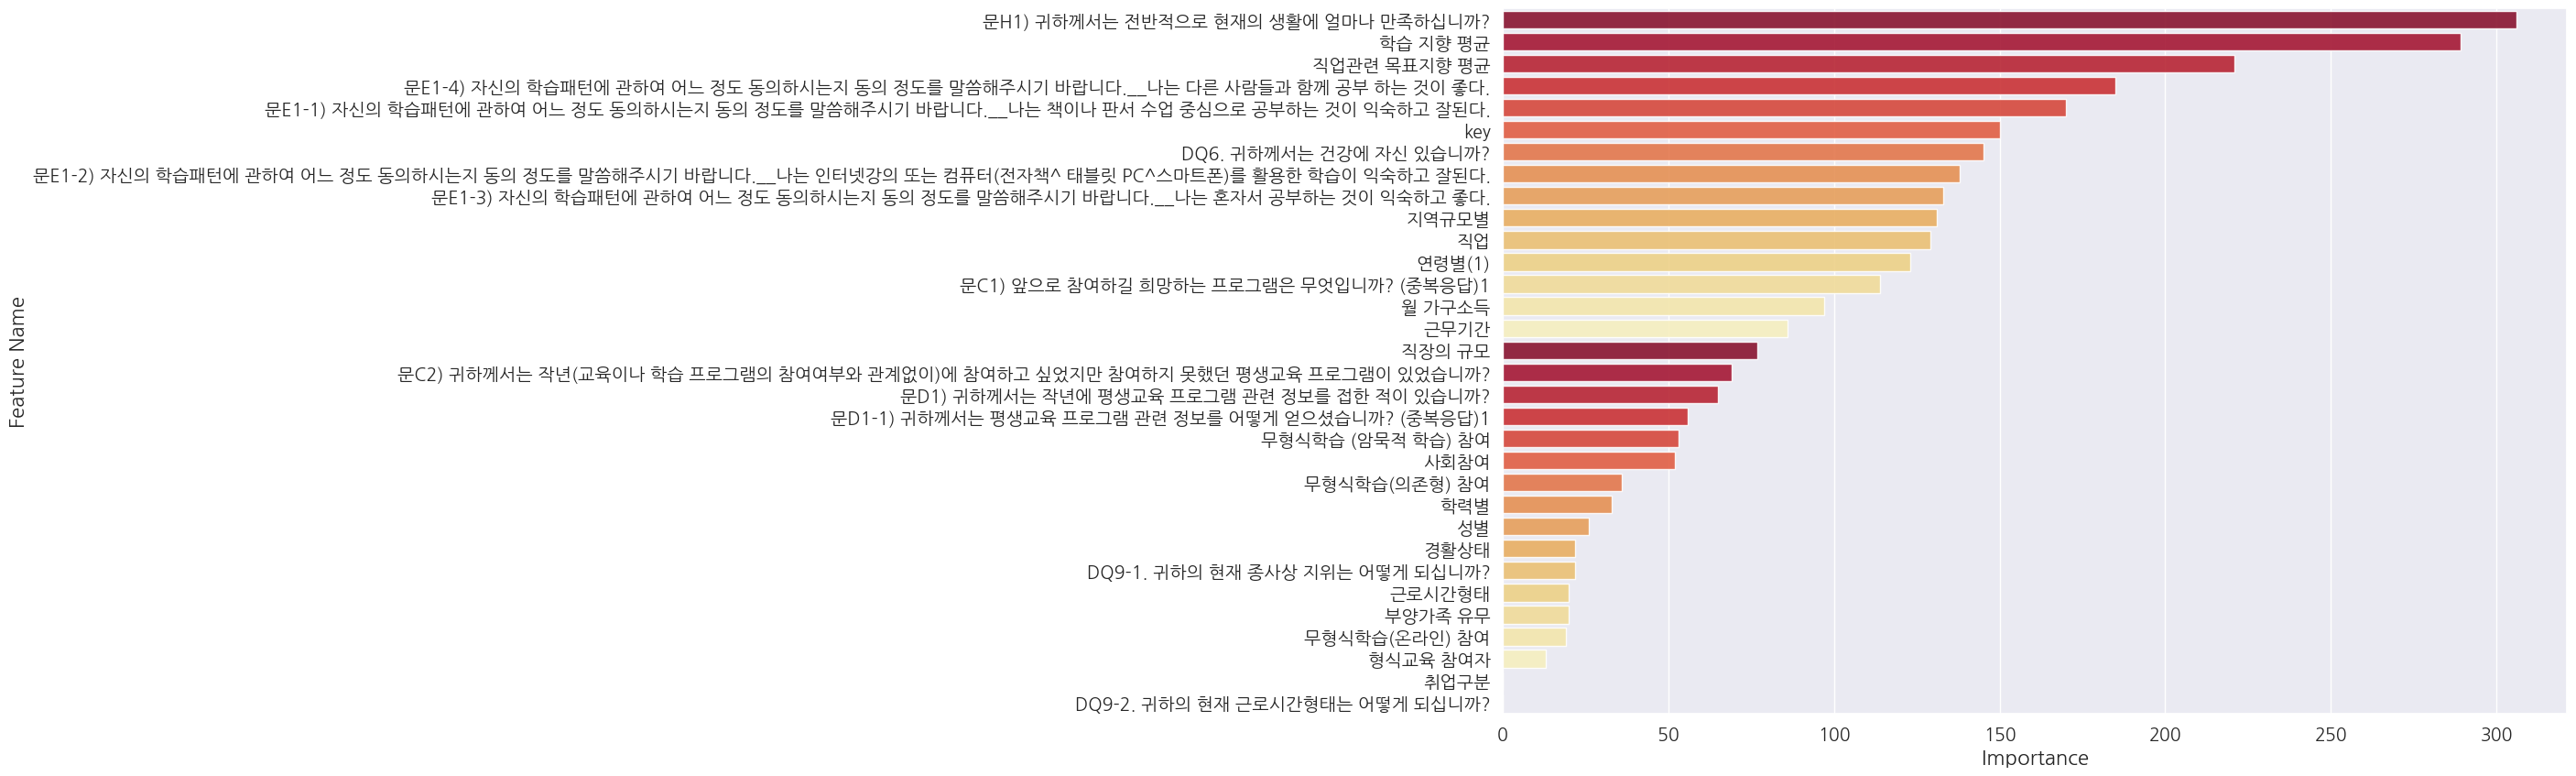

Performance: 


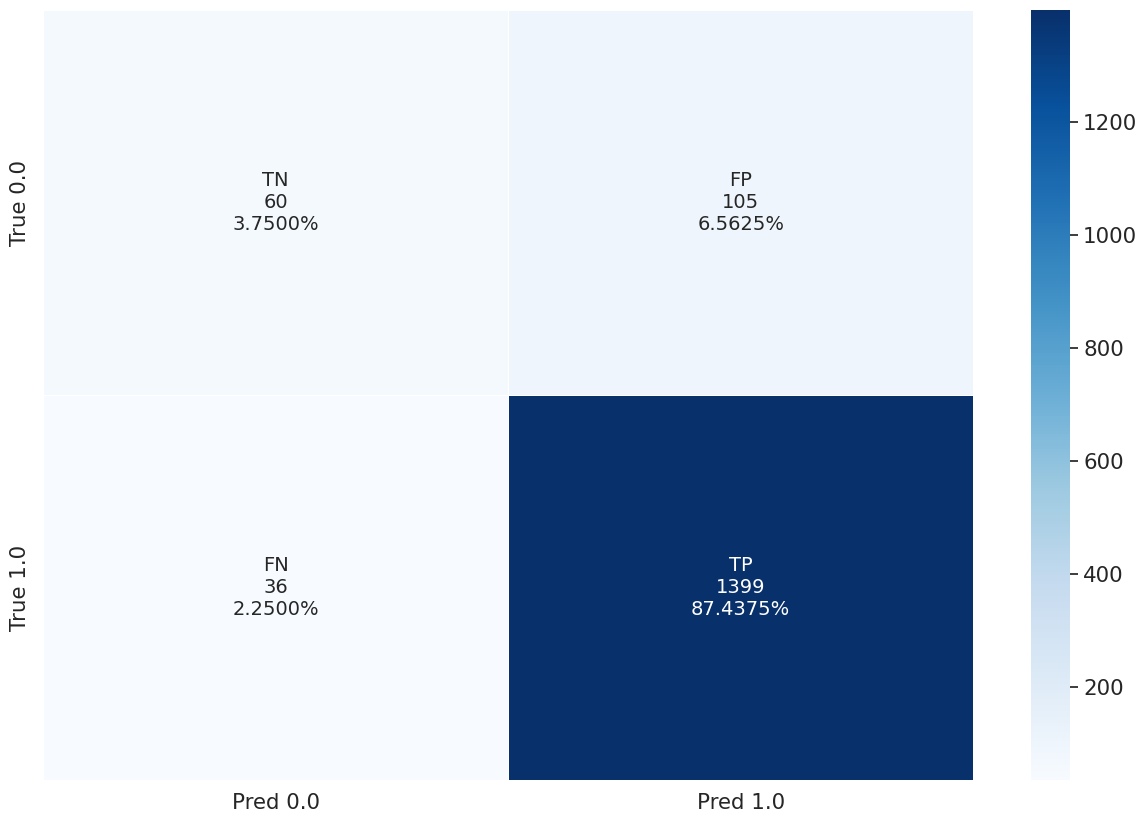

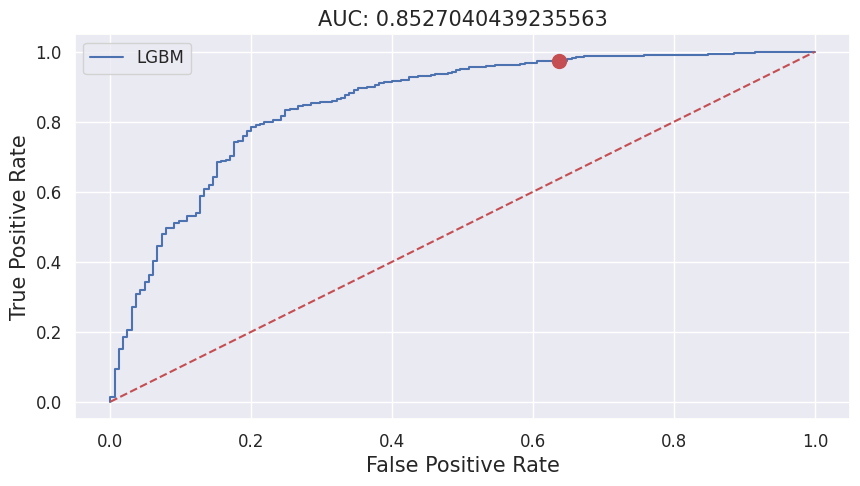

LGBMClassifier(class_weight='balanced', random_state=123)

N True Positive True Negative False Positive False Negative  \
Test set  1600          1399            60            105             36   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9302 0.9749      0.3636   0.9520   0.9119            0.6693   

            AUC  
Test set 0.8527

N True Positive True Negative False Positive  \
Entire population  13002          7083          5539            327   

                  False Negative Precision Recall Specificity F1-score  \
Entire population             53    0.9559 0.9926      0.9443   0.9739   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9708            0.9684 0.9943

In [53]:
model_lgbm, Score_te_lgbm, Score_trte_lgbm = modeling_LGBMClassifier(X_train, Y_train, 
                                                         X_test, Y_test, 
                                                         X_colname=X_colname, 
                                                         shap=not SHAP, 
                                                         X_top_display=X_TOP_DISPLAY, 
                                                         dependency=DEPENDENCY,
                                                         label_list=LABEL_LIST)
display(model_lgbm, Score_te_lgbm, Score_trte_lgbm)

Learning rate set to 0.240583
0:	learn: 0.4769071	total: 10.3ms	remaining: 1.02s
1:	learn: 0.3955457	total: 15.8ms	remaining: 773ms
2:	learn: 0.3408902	total: 19.6ms	remaining: 634ms
3:	learn: 0.3045375	total: 25.1ms	remaining: 601ms
4:	learn: 0.2650917	total: 29.6ms	remaining: 563ms
5:	learn: 0.2470925	total: 33.8ms	remaining: 530ms
6:	learn: 0.2368213	total: 39.1ms	remaining: 520ms
7:	learn: 0.2169640	total: 44.3ms	remaining: 509ms
8:	learn: 0.2060572	total: 50.4ms	remaining: 510ms
9:	learn: 0.2010461	total: 54.5ms	remaining: 491ms
10:	learn: 0.1886989	total: 59.4ms	remaining: 481ms
11:	learn: 0.1791651	total: 63.6ms	remaining: 466ms
12:	learn: 0.1739958	total: 67.8ms	remaining: 454ms
13:	learn: 0.1690061	total: 72ms	remaining: 442ms
14:	learn: 0.1656792	total: 76.5ms	remaining: 433ms
15:	learn: 0.1639747	total: 80ms	remaining: 420ms
16:	learn: 0.1615050	total: 83.8ms	remaining: 409ms
17:	learn: 0.1587047	total: 88.5ms	remaining: 403ms
18:	learn: 0.1549685	total: 92.2ms	remaining: 39

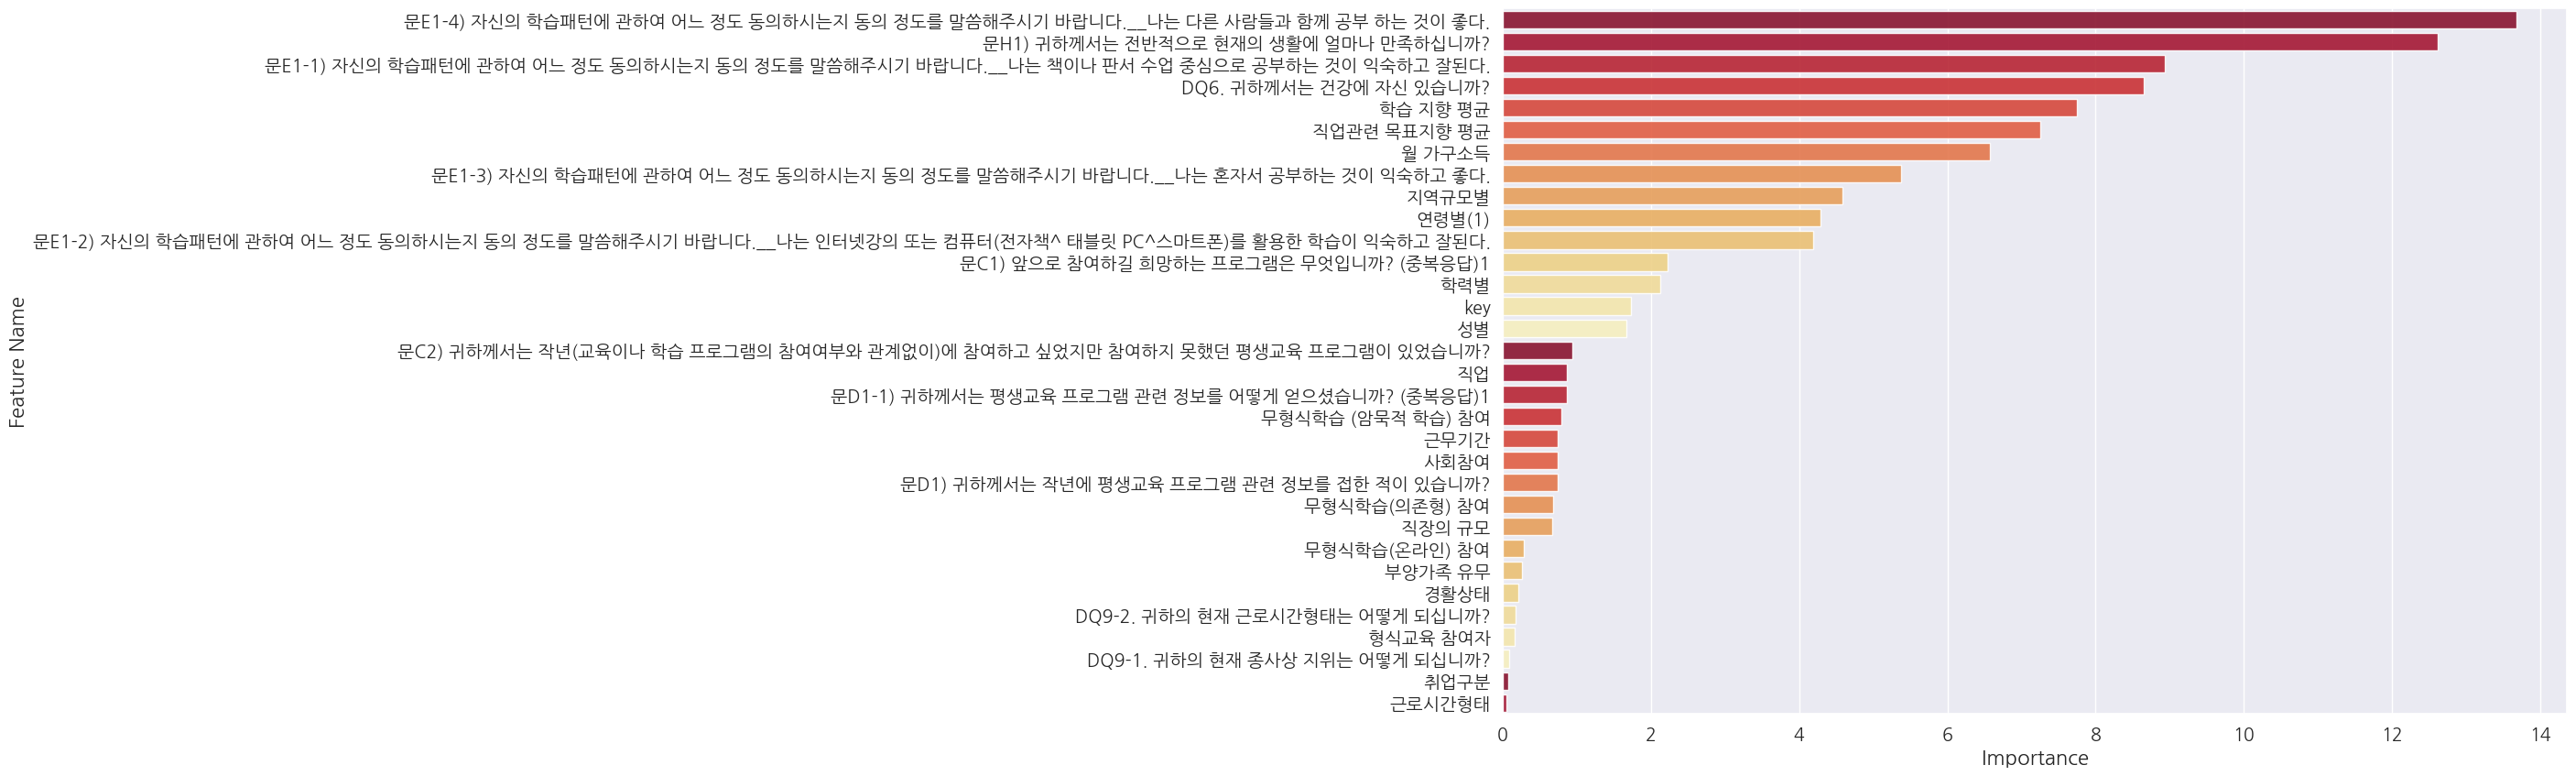

Performance: 


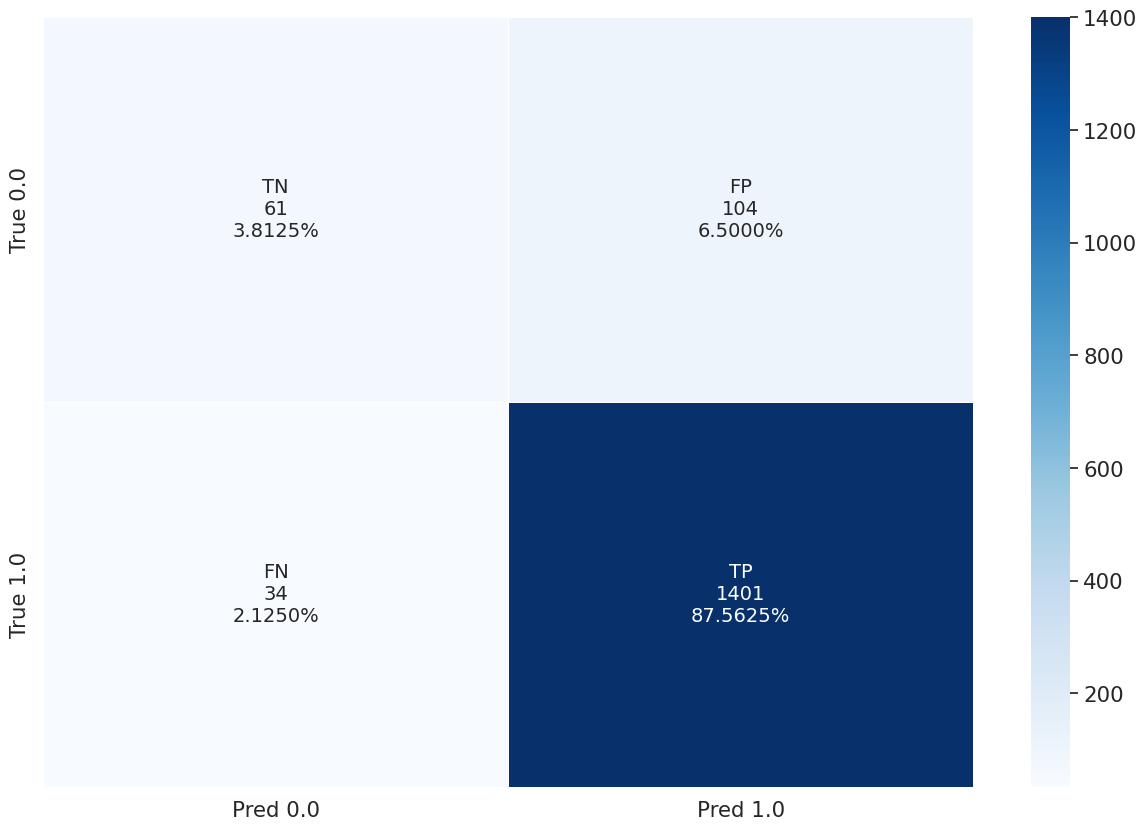

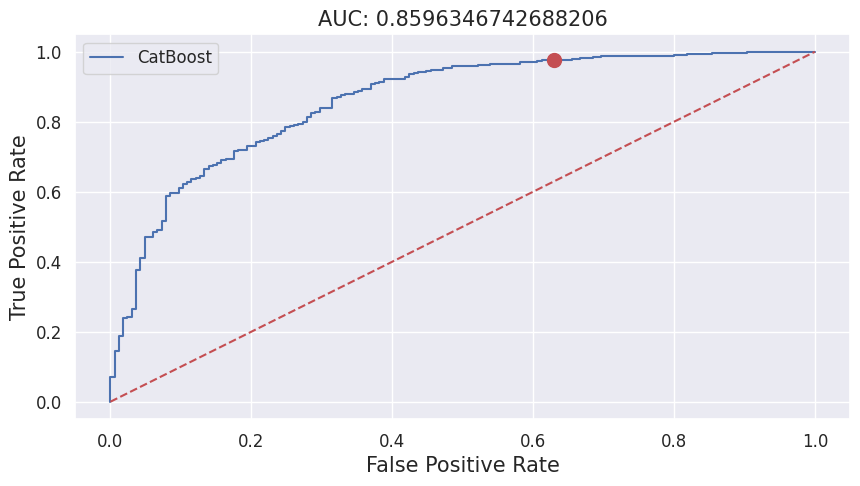

N True Positive True Negative False Positive False Negative  \
Test set  1600          1401            61            104             34   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.9309 0.9763      0.3697   0.9531   0.9137            0.6730   

            AUC  
Test set 0.8596

N True Positive True Negative False Positive  \
Entire population  13002          7084          5556            310   

                  False Negative Precision Recall Specificity F1-score  \
Entire population             52    0.9581 0.9927      0.9472   0.9751   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9722            0.9699 0.9939

In [54]:
model_catb, Score_te_catb, Score_trte_catb = modeling_CatBoostClassifier(X_train, Y_train, 
                                                             X_test, Y_test, 
                                                             X_colname=X_colname, 
                                                             shap=not SHAP, 
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             dependency=DEPENDENCY,
                                                             label_list=LABEL_LIST)
display(model_catb, Score_te_catb, Score_trte_catb)

# Summary

In [55]:
folder_location = os.path.join(os.getcwd(),'Result')
prediction_summary(folder_location=folder_location, 
                   algonames=['Logistic Regression', 'Random Forest', 'XGBoost', 'LGBM', 'CatBoost'])


# Prediction and Comparison

In [56]:
# Train, Test 분리
X_test, Y_test = df_test[X_colname], df_test[[Y_colname]]
print(X_test.shape, Y_test.shape)
print('Data Split!')
# 스케일링
X_test = scaler.transform(X_test)
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())   

(12514, 32) (12514, 1)
Data Split!
(12514, 32) (12514, 1) -0.1111111111111111 1.0000000000000002


Learning rate set to 0.240583
0:	learn: 0.4769071	total: 9.75ms	remaining: 965ms
1:	learn: 0.3955457	total: 13.9ms	remaining: 683ms
2:	learn: 0.3408902	total: 18.4ms	remaining: 596ms
3:	learn: 0.3045375	total: 26.6ms	remaining: 639ms
4:	learn: 0.2650917	total: 31.6ms	remaining: 600ms
5:	learn: 0.2470925	total: 36.4ms	remaining: 570ms
6:	learn: 0.2368213	total: 42.7ms	remaining: 567ms
7:	learn: 0.2169640	total: 47.6ms	remaining: 548ms
8:	learn: 0.2060572	total: 54.9ms	remaining: 555ms
9:	learn: 0.2010461	total: 61.8ms	remaining: 556ms
10:	learn: 0.1886989	total: 66ms	remaining: 534ms
11:	learn: 0.1791651	total: 71.5ms	remaining: 524ms
12:	learn: 0.1739958	total: 75.9ms	remaining: 508ms
13:	learn: 0.1690061	total: 79.8ms	remaining: 490ms
14:	learn: 0.1656792	total: 86.5ms	remaining: 490ms
15:	learn: 0.1639747	total: 90.9ms	remaining: 477ms
16:	learn: 0.1615050	total: 97.9ms	remaining: 478ms
17:	learn: 0.1587047	total: 102ms	remaining: 467ms
18:	learn: 0.1549685	total: 109ms	remaining: 46

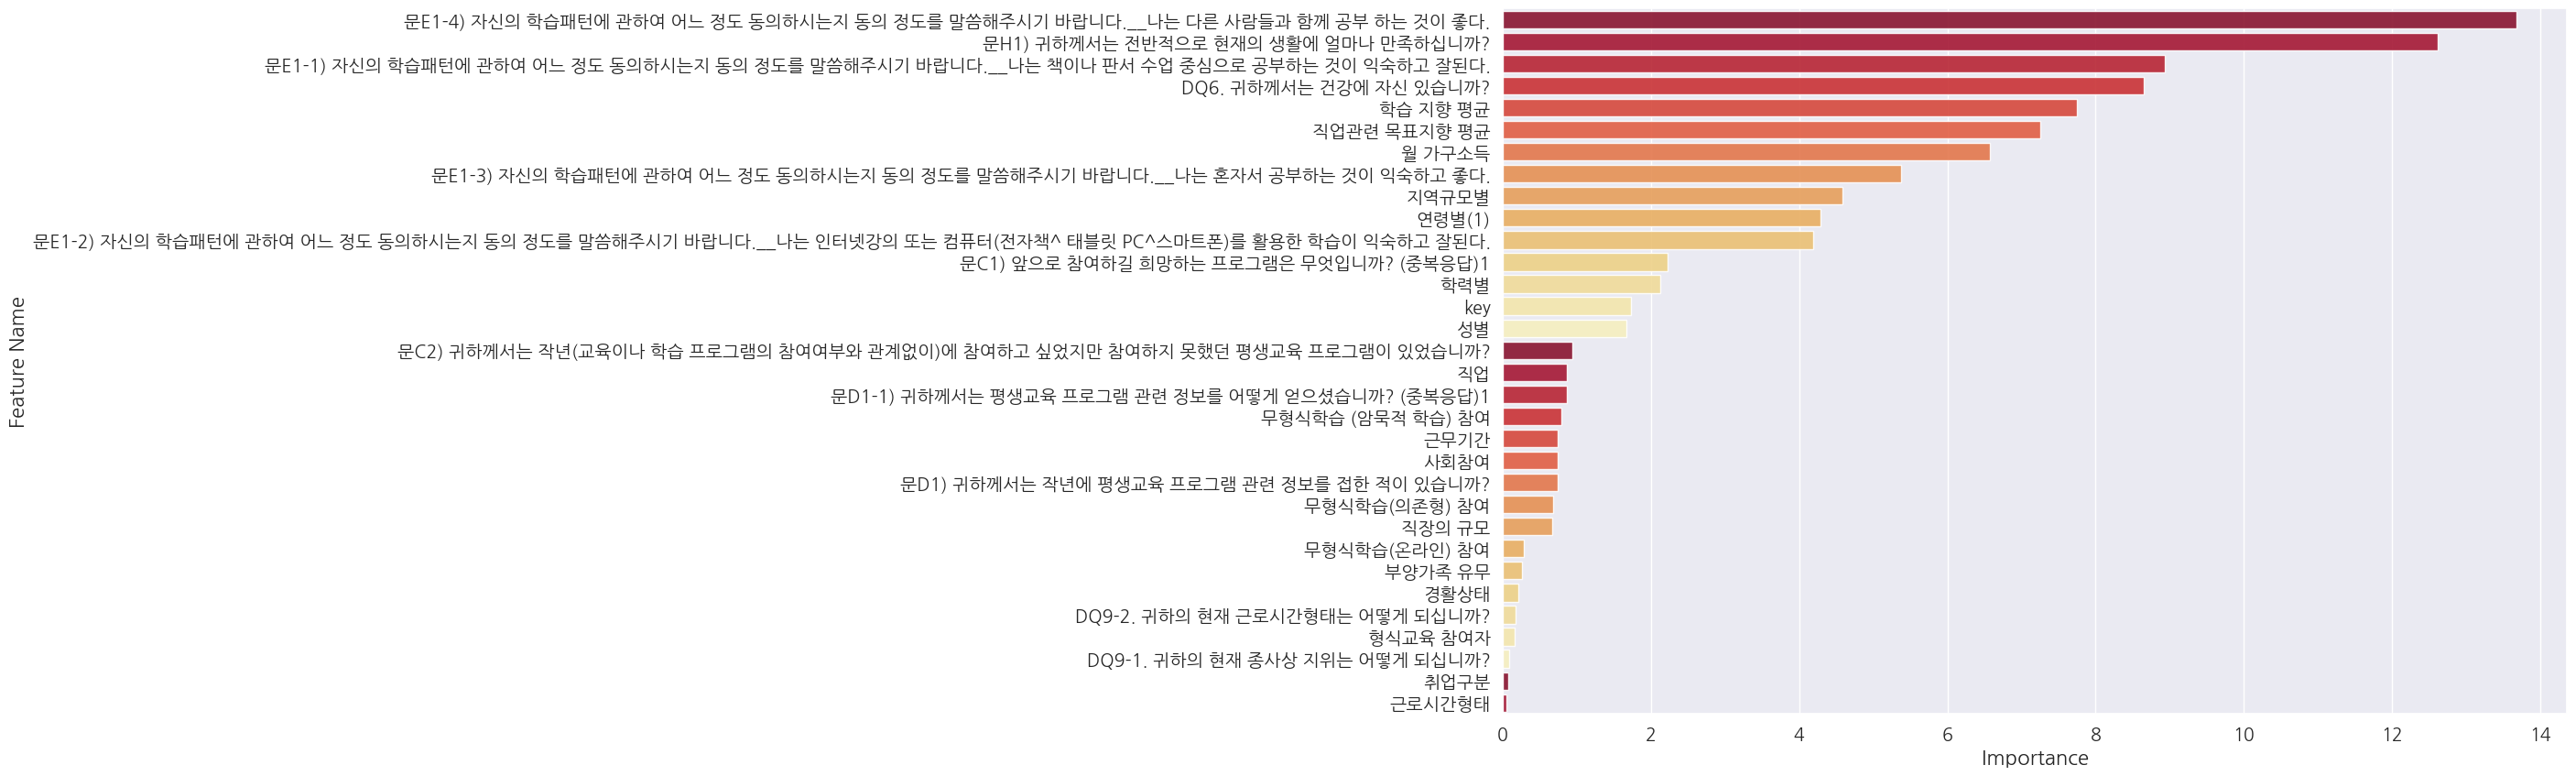

Performance: 


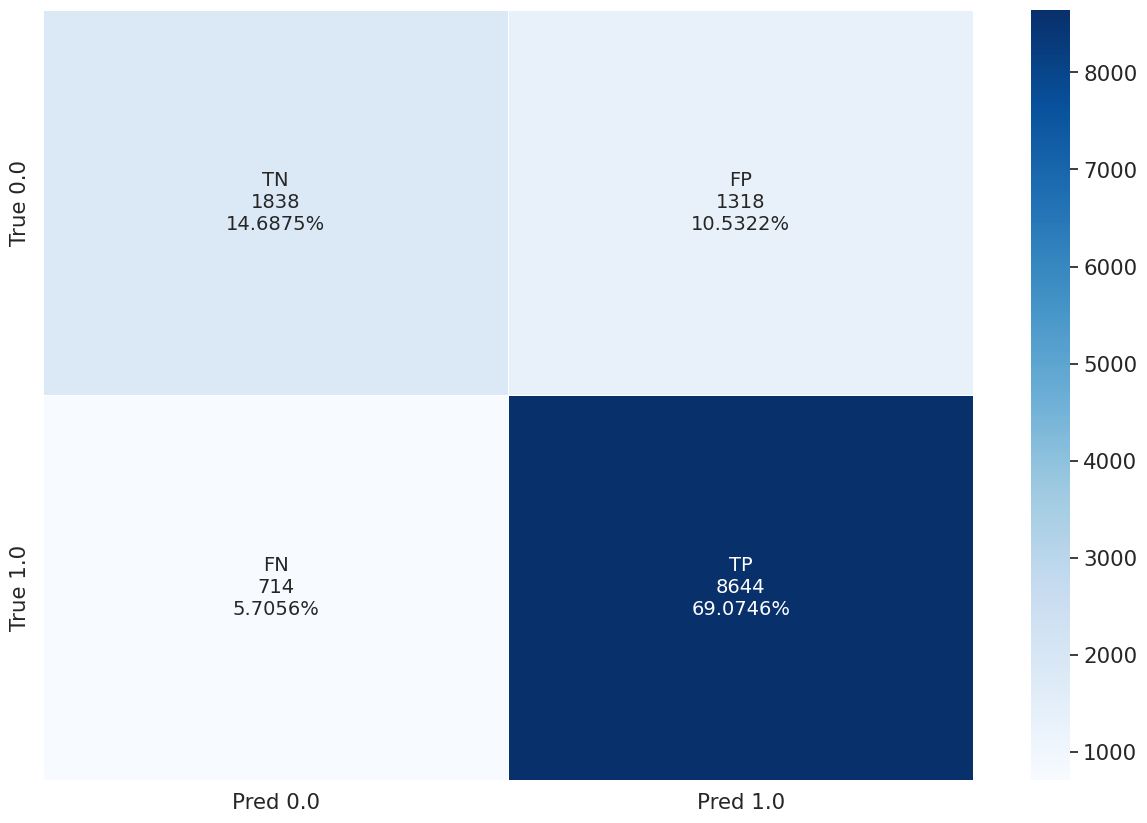

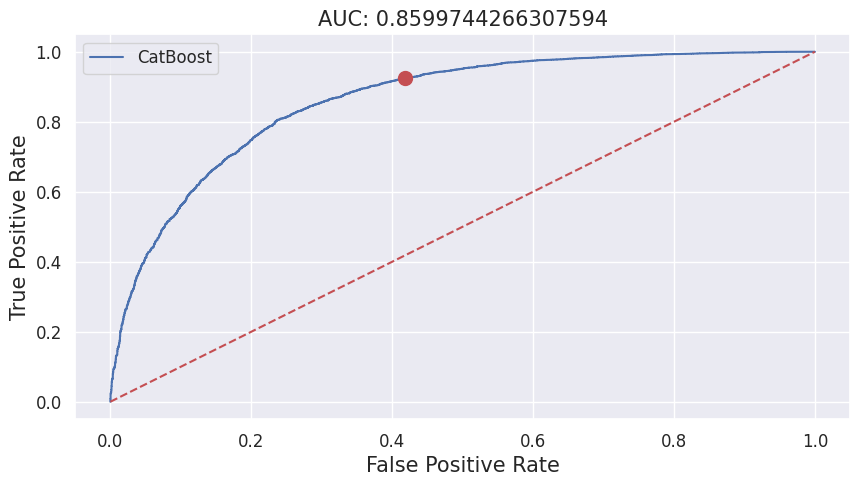

N True Positive True Negative False Positive False Negative  \
Test set  12514          8644          1838           1318            714   

         Precision Recall Specificity F1-score Accuracy Balanced Accuracy  \
Test set    0.8677 0.9237      0.5824   0.8948   0.8376            0.7530   

            AUC  
Test set 0.8600

N True Positive True Negative False Positive  \
Entire population  23916         14327          7333           1524   

                  False Negative Precision Recall Specificity F1-score  \
Entire population            732    0.9039 0.9514      0.8279   0.9270   

                  Accuracy Balanced Accuracy    AUC  
Entire population   0.9057            0.8897 0.9560

In [57]:
model_catb, Score_te_catb, Score_trte_catb = modeling_CatBoostClassifier(X_train, Y_train, 
                                                             X_test, Y_test, 
                                                             X_colname=X_colname, 
                                                             shap=not SHAP, 
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             dependency=DEPENDENCY,
                                                             label_list=LABEL_LIST)
display(model_catb, Score_te_catb, Score_trte_catb)

In [58]:
# 코멘트
# 비형식교육 참여자 변수 삭제하고 학습한건가?
# 왜 oversampling을 고려하지 않았지?
# 미참여자들의 만족도 예측시 스케일링 학습을 다시한 이유는?